Esercizio:

Utilizzando il dataset "Diabetes" disponibile in scikit-learn, sviluppa un modello
di regressione lineare per predire la progressione della malattia del diabete
basandoti sulle dieci misurazioni cliniche fornite.

Istruzioni:

- Carica il dataset "Diabetes" utilizzando sklearn.datasets.load_diabetes().
- Esplora i dati per comprendere le caratteristiche disponibili e la variabile
target.
- Suddividi il dataset in set di training e test.
- Crea un modello di regressione lineare utilizzando LinearRegression di scikit-
learn.
- Addestra il modello sui dati di training.
- Valuta le prestazioni del modello sui dati di test utilizzando metriche
appropriate come l'Errore Quadratico Medio (MSE) e il Coefficiente di
Determinazione (R²).
- Analizza i risultati e discuti l'efficacia del modello.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
diabetes = load_diabetes(scaled = False)
X = diabetes.data
y = diabetes.target

In [20]:
diabetes_df = pd.DataFrame(data=X, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [21]:
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [22]:
diabetes_df["target"]= diabetes_df["target"].astype(int)

In [23]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135


In [24]:
diabetes_df["target"].unique()

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144, 168,  68,  49, 245, 184, 202, 137,  85,
       131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,  90, 100,
        55,  61,  92, 259,  53, 190, 142, 155, 225, 104, 182, 128,  52,
        37, 170,  71, 163, 150, 160, 178,  48, 270, 111,  42, 200, 113,
       143,  51, 210, 134,  98, 164,  96, 162, 279,  83, 302, 198,  95,
       232,  81, 246, 297, 258, 229, 275, 281, 173, 180,  84, 121, 161,
        99, 109, 115, 268, 274, 158, 107, 103, 272, 280, 336, 317, 235,
        60, 174, 126, 288,  88, 292, 197, 186,  25, 195, 217, 172, 214,
        70, 220, 152,  47,  74, 295, 127, 237,  64,  79,  91, 116,  86,
       122,  72,  39, 196, 222, 277,  77, 191,  73, 263, 248, 296,  78,
        93, 208, 108, 154, 124,  67, 257, 262, 177, 187, 125, 215, 303,
       243, 153, 346,  89,  50, 308, 145,  45, 264, 241,  66,  94, 230,
       181, 156, 233, 219,  80, 332,  31, 236, 253,  44, 114, 14

C:\Users\stefano\AppData\Local\Temp\ipykernel_7324\2823010031.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


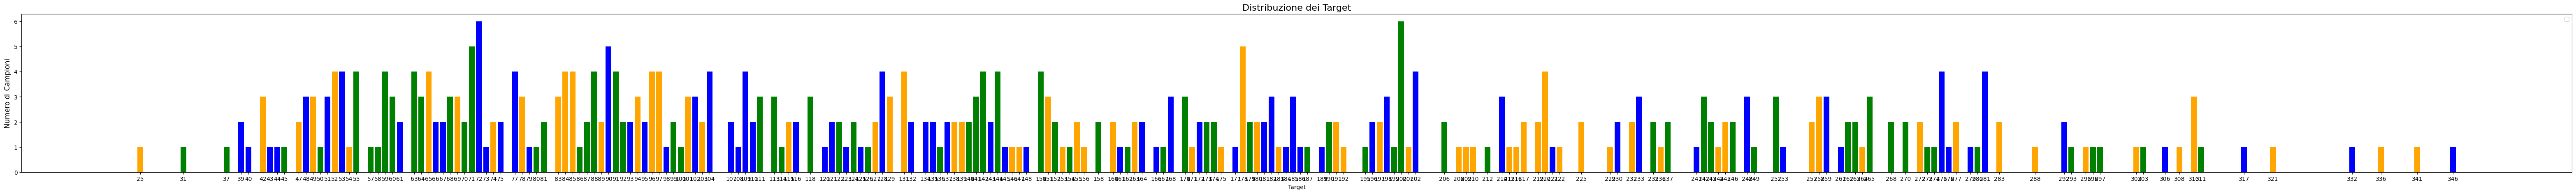

In [25]:
plt.figure(figsize=(80, 5))
bars = plt.bar(diabetes_df["target"].value_counts().index, diabetes_df["target"].value_counts().values, color=['green','blue','orange'])
plt.title('Distribuzione dei Target', fontsize=16)
plt.xlabel('Target', fontsize=10)
plt.ylabel('Numero di Campioni', fontsize=12)
plt.xticks(ticks=diabetes_df["target"].value_counts().index, labels=[f'{i}' for i in diabetes_df["target"].value_counts().index])
plt.legend()
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('linear', LinearRegression())
])

In [28]:
param_dist = {
    'pca__n_components': [2,5,8,10],

}

In [29]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=100, cv=cv,
    scoring='neg_mean_squared_error', random_state=42)

In [30]:
search = random_search.fit(X_train, y_train)
pipeline.set_params(**search.best_params_).fit(X_train, y_train)
print(search.best_params_)

y_pred = pipeline.predict(X_test)

{'pca__n_components': 8}


c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [31]:
mse = mean_squared_error(y_test, y_pred)
print(f"Errore Quadratico Medio del modello: {mse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"Coefficiente di Determinazione del modello: {r2:.2f}")

Errore Quadratico Medio del modello: 2831.37
Coefficiente di Determinazione del modello: 0.48
